## S2Pandas key features

You can try out vgridpandas by using the cloud-computing platforms below without having to install anything on your computer:

[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://demo.gishub.vn/lab/index.html?path=notebooks/vgridpandas/02_s2.ipynb)
[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgridpandas/blob/master)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgridpandas/HEAD)

### Install vgridpandas

In [1]:
# %pip install vgridpandas

### Latlong to S2

In [9]:
import pandas as pd
from vgridpandas import s2pandas
df = pd.read_csv('https://github.com/uber-web/kepler.gl-data/raw/master/nyctrips/data.csv')
df = df.rename({'pickup_longitude': 'lon', 'pickup_latitude': 'lat'}, axis=1)[['lon', 'lat', 'passenger_count']]
df = df.head(100)
resolution = 8
df = df.s2.latlon2s2(resolution)
df.head()

,lon,lat,passenger_count,s2_res
s2,,,,
89c25,-73.993896,40.750111,1,8
89c25,-73.976425,40.739811,1,8
89c25,-73.968704,40.754246,5,8
89c25,-73.863060,40.769581,5,8
89c25,-73.945541,40.779423,1,8


### S2 to geo boundary

In [10]:
df = df.s2.s22geo() # if set_index = False in the previous step, call df = df.s2.s22geo(s2_col = 's2_00')
df.head()

,lon,lat,passenger_count,s2_res,geometry
s2,,,,,
89c25,-73.993896,40.750111,1,8,"POLYGON ((-74.21793 40.82771, -74.21793 40.510..."
89c25,-73.976425,40.739811,1,8,"POLYGON ((-74.21793 40.82771, -74.21793 40.510..."
89c25,-73.968704,40.754246,5,8,"POLYGON ((-74.21793 40.82771, -74.21793 40.510..."
89c25,-73.863060,40.769581,5,8,"POLYGON ((-74.21793 40.82771, -74.21793 40.510..."
89c25,-73.945541,40.779423,1,8,"POLYGON ((-74.21793 40.82771, -74.21793 40.510..."


### (Multi)Linestring/ (Multi)Polygon to S2

<Axes: >

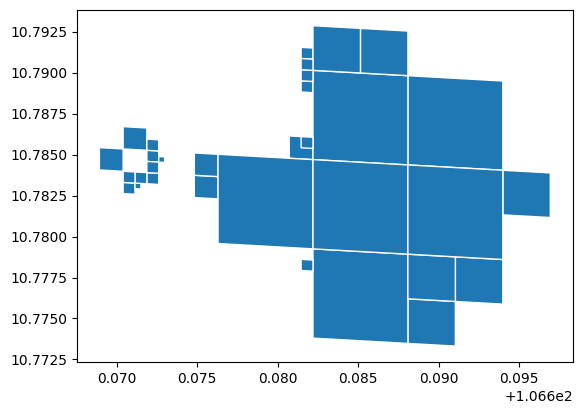

In [6]:
import geopandas as gpd
from vgridpandas import s2pandas

gdf = gpd.read_file('https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/shape/polygon.geojson')
resolution = 18
gdf_polyfill = gdf.s2.polyfill(resolution, compact = True, predicate = "largest_overlap", explode = True)
gdf_polyfill.head()
gdf_polyfill = gdf_polyfill.s2.s22geo("s2")
gdf_polyfill.plot(edgecolor = "white")

### S2 point binning

<Axes: >

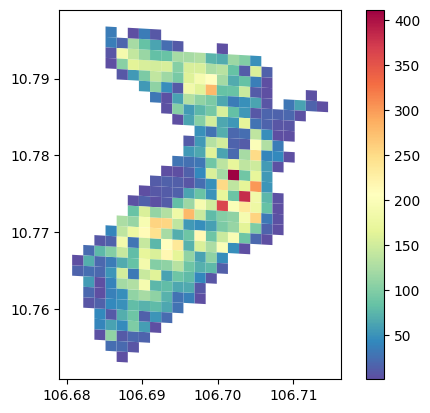

In [8]:
import pandas as pd
import geopandas as gpd
from vgridpandas import s2pandas
resolution = 16
df = pd.read_csv("https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/csv/dist1_pois.csv")
# df = gpd.read_file("https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/shape/dist1_pois.geojson")
df.head()
stats = "count"
df_bin = df.s2.s2bin(resolution=resolution, stats = stats, 
                    # numeric_column="confidence",
                    # category_column="category",
                    return_geometry=True)
df_bin.plot(
    column=stats,        # numeric column to base the colors on
    cmap='Spectral_r',        # color scheme (matplotlib colormap)
    legend=True,  
    linewidth=0.2          # boundary width (optional)
)
